In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import  metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, LeaveOneOut, ShuffleSplit, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [2]:
data = pd.read_csv("D:\\Locker\\KJS\\TRIM 3\\AIML Project\\Data\\data.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
data.shape

(569, 33)

In [7]:
data.isnull()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


<AxesSubplot:>

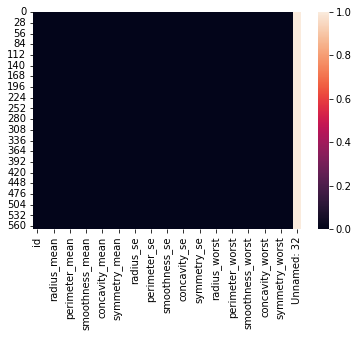

In [8]:
sns.heatmap(data.isnull())

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

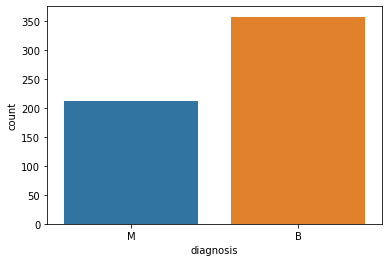

In [9]:
sns.countplot(x='diagnosis', data=data)

In [10]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [11]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [12]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [13]:
channel_map = {'M':0, 'B':1}

In [14]:
data['diagnosis'] = data['diagnosis'].map(channel_map)

In [15]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [17]:
cor = data.corr()
cor

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,-0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
diagnosis,-0.039769,1.000000,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,-0.596534,-0.696360,-0.776614,...,-0.456903,-0.782914,-0.733825,-0.421465,-0.590998,-0.659610,-0.793566,-0.416294,-0.323872,NaN
radius_mean,0.074626,-0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,-0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,-0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.096893,-0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,-0.012968,-0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.000096,-0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.050080,-0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.044158,-0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN


<AxesSubplot:>

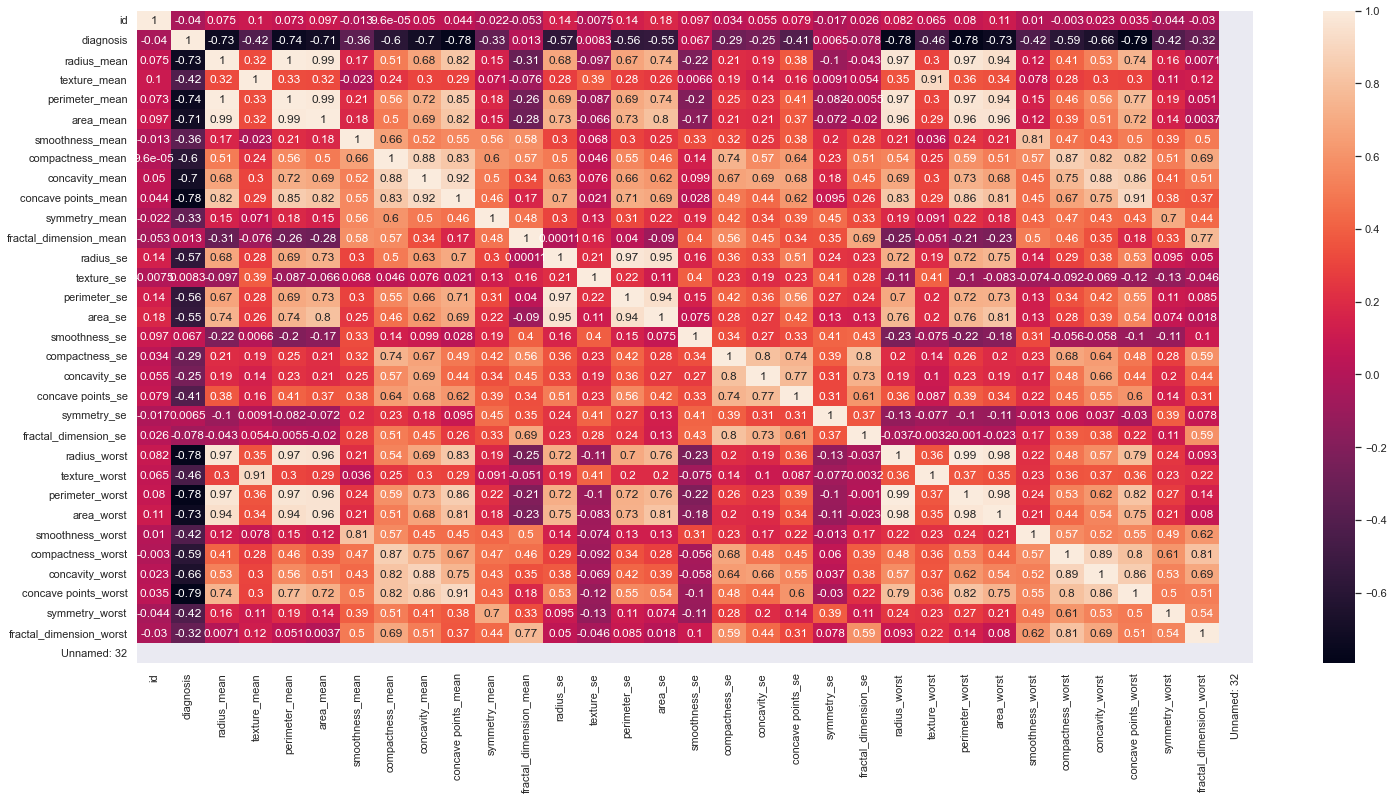

In [18]:
sns.set(rc = {'figure.figsize':(25,12)})
sns.heatmap(cor,annot=True)

# From above correlation we can see that 'concave points_worst' has the highest absolute correlation with diagnosis

In [19]:
srx = data['concave points_worst']
srx.shape

(569,)

In [20]:
srxx = srx.values.reshape(-1,1)
srxx.shape

(569, 1)

# We will use 'concave points_worst' as feature for simple LR

In [21]:
y = data['diagnosis']
y.shape

(569,)

In [22]:
ydt = y.values.reshape(-1,1)
ydt.shape

(569, 1)

In [23]:
xtr, xts, ytr, yts = train_test_split(srxx,ydt, test_size = 0.1, random_state = 0)
print("Size of training set:", xtr.shape)
print("Size of testing set:", xts.shape)

Size of training set: (512, 1)
Size of testing set: (57, 1)


# Linear Regression

In [24]:
LR=LinearRegression() 

In [25]:
LR.fit(xtr,ytr)

LinearRegression()

In [26]:
y_pred = LR.predict(xts)

In [27]:
acc = mean_squared_error(yts, y_pred)
acc

0.09377714853706126

In [28]:
LR.score(xts,yts)

0.6043091485754388

In [29]:
df=pd.DataFrame({'Actual': yts.flatten(),'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,0,0.107895
1,1,0.951039
2,1,0.822518
3,1,0.862394
4,1,1.008702
5,1,0.803569
6,1,0.665341
7,1,0.966385
8,1,1.300096
9,1,1.063284


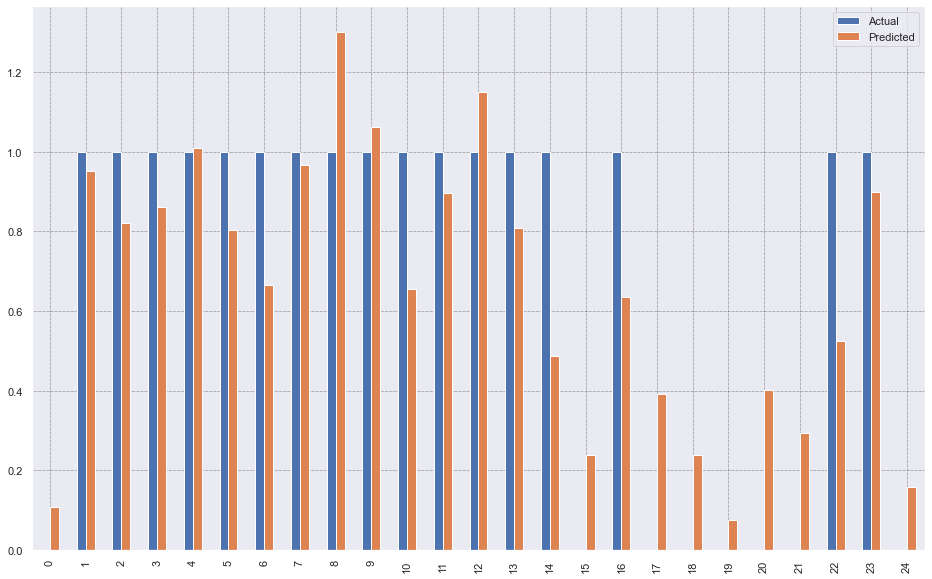

In [30]:
df1=df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='major',linestyle=':',linewidth='0.5',color='black')
plt.show()

In [31]:
print('Mean Absolute Error:',mean_absolute_error(yts,y_pred))
print('Mean Squared Error:',mean_squared_error(yts,y_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(yts,y_pred)))

Mean Absolute Error: 0.24369328283525554
Mean Squared Error: 0.09377714853706126
Root Mean Squared Error: 0.3062305480141739


# Logistic Regression

In [32]:
LR=LogisticRegression() 

In [33]:
LR.fit(xtr,ytr)

D:\Install directory\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [34]:
y_pred = LR.predict(xts)

In [35]:
acc = mean_squared_error(yts, y_pred)
acc

0.22807017543859648

In [36]:
LR.score(xts,yts)

0.7719298245614035

In [37]:
df=pd.DataFrame({'Actual': yts.flatten(),'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


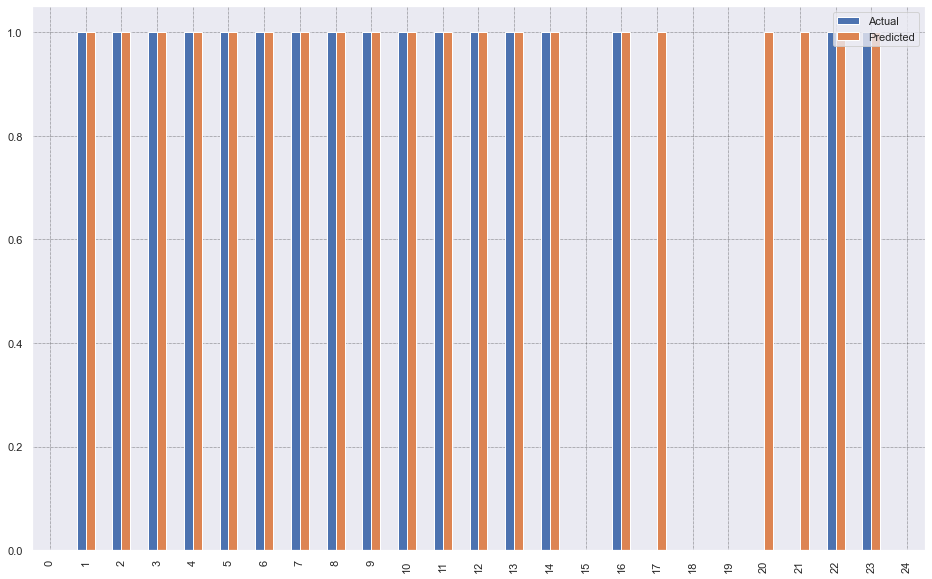

In [38]:
df1=df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='major',linestyle=':',linewidth='0.5',color='black')
plt.show()

In [39]:
print('Mean Absolute Error:',mean_absolute_error(yts,y_pred))
print('Mean Squared Error:',mean_squared_error(yts,y_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(yts,y_pred)))

Mean Absolute Error: 0.22807017543859648
Mean Squared Error: 0.22807017543859648
Root Mean Squared Error: 0.4775669329409193


# Multiclass Linear Regression

In [40]:
myx = data.drop(['id','Unnamed: 32','diagnosis'],axis=1)

In [41]:
myx

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [42]:
myy = data['diagnosis']

In [43]:
myy

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [44]:
myx.shape

(569, 30)

In [45]:
myy.shape

(569,)

In [46]:
myyy = myy.values.reshape(-1,1)
myyy

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
    

In [47]:
myyy.shape

(569, 1)

In [48]:
xtr, xts, ytr, yts = train_test_split(myx,myyy, test_size = 0.3, random_state = 0)
print("Size of training set:", xtr.shape)
print("Size of training set:", xts.shape)

Size of training set: (398, 30)
Size of training set: (171, 30)


In [49]:
LR=LinearRegression()

In [50]:
LR.fit(xtr,ytr)

LinearRegression()

In [51]:
y_pred = LR.predict(xts)

In [52]:
acc = mean_squared_error(yts, y_pred)
acc

0.062384962436604595

In [53]:
LR.score(xts, yts)

0.7318931971474494

In [54]:
df=pd.DataFrame({'Actual': yts.flatten(),'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,0,0.177074
1,1,0.819875
2,1,0.973552
3,1,0.806176
4,1,0.956128
...,...,...
166,0,0.347625
167,0,0.188163
168,1,0.704667
169,1,0.902653


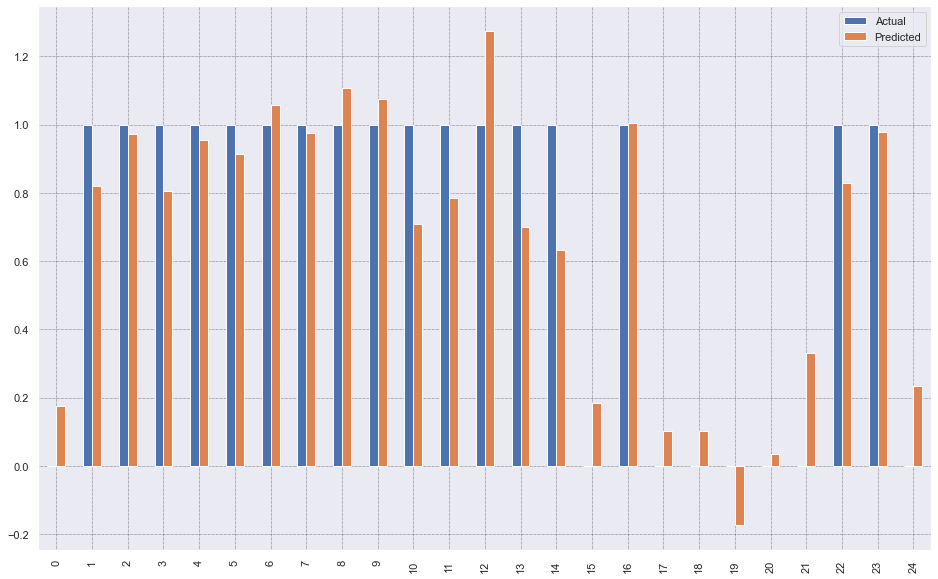

In [55]:
df1=df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='major',linestyle=':',linewidth='0.5',color='black')
plt.show()

In [56]:
print('Mean Absolute Error:',mean_absolute_error(yts,y_pred))
print('Mean Squared Error:',mean_squared_error(yts,y_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(yts,y_pred)))

Mean Absolute Error: 0.1960125785952852
Mean Squared Error: 0.062384962436604595
Root Mean Squared Error: 0.24976981890653763


# Multiclass Logistic Regression

In [57]:
LR=LogisticRegression()

In [58]:
LR.fit(xtr,ytr)

D:\Install directory\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Install directory\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
y_pred = LR.predict(xts)

In [60]:
acc = mean_squared_error(yts, y_pred)
acc

0.04678362573099415

In [61]:
LR.score(xts, yts)

0.9532163742690059

In [62]:
df=pd.DataFrame({'Actual': yts.flatten(),'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
166,0,0
167,0,0
168,1,1
169,1,1


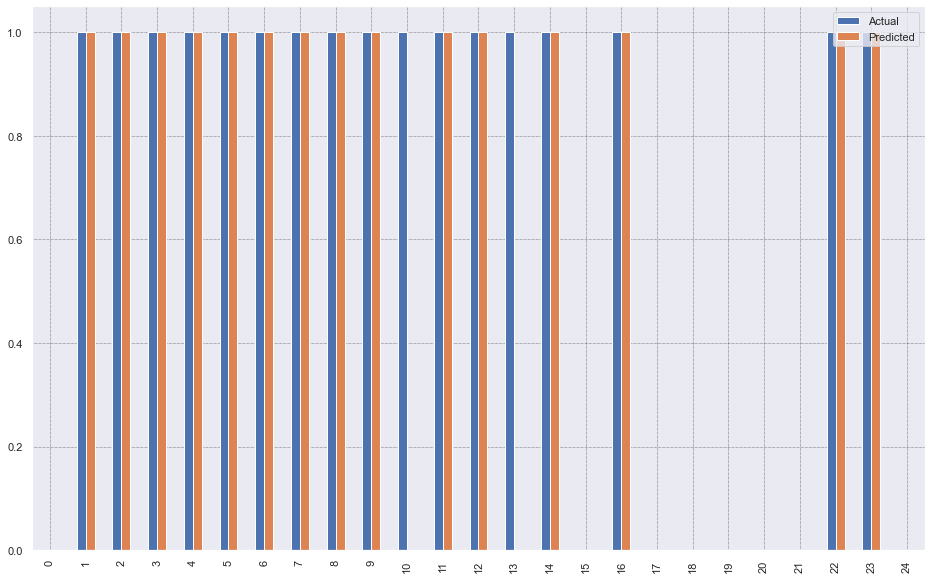

In [63]:
df1=df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='major',linestyle=':',linewidth='0.5',color='black')
plt.show()

In [64]:
print('Mean Absolute Error:',mean_absolute_error(yts,y_pred))
print('Mean Squared Error:',mean_squared_error(yts,y_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(yts,y_pred)))

Mean Absolute Error: 0.04678362573099415
Mean Squared Error: 0.04678362573099415
Root Mean Squared Error: 0.21629522817435004


# Naive-Bayes

In [65]:
nb = BernoulliNB()
gnb = GaussianNB()
mnb = MultinomialNB()

In [66]:
nb.fit(xtr,ytr)
gnb.fit(xtr,ytr)
mnb.fit(xtr,ytr)

D:\Install directory\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Install directory\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Install directory\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

# BernoulliNB

In [67]:
ypred = nb.predict(xts)

In [68]:
accuracy_score(yts,ypred)

0.631578947368421

In [69]:
print(classification_report(yts,ypred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.63      1.00      0.77       108

    accuracy                           0.63       171
   macro avg       0.32      0.50      0.39       171
weighted avg       0.40      0.63      0.49       171



D:\Install directory\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Install directory\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Install directory\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
cf = confusion_matrix(yts,ypred)
cf

array([[  0,  63],
       [  0, 108]], dtype=int64)

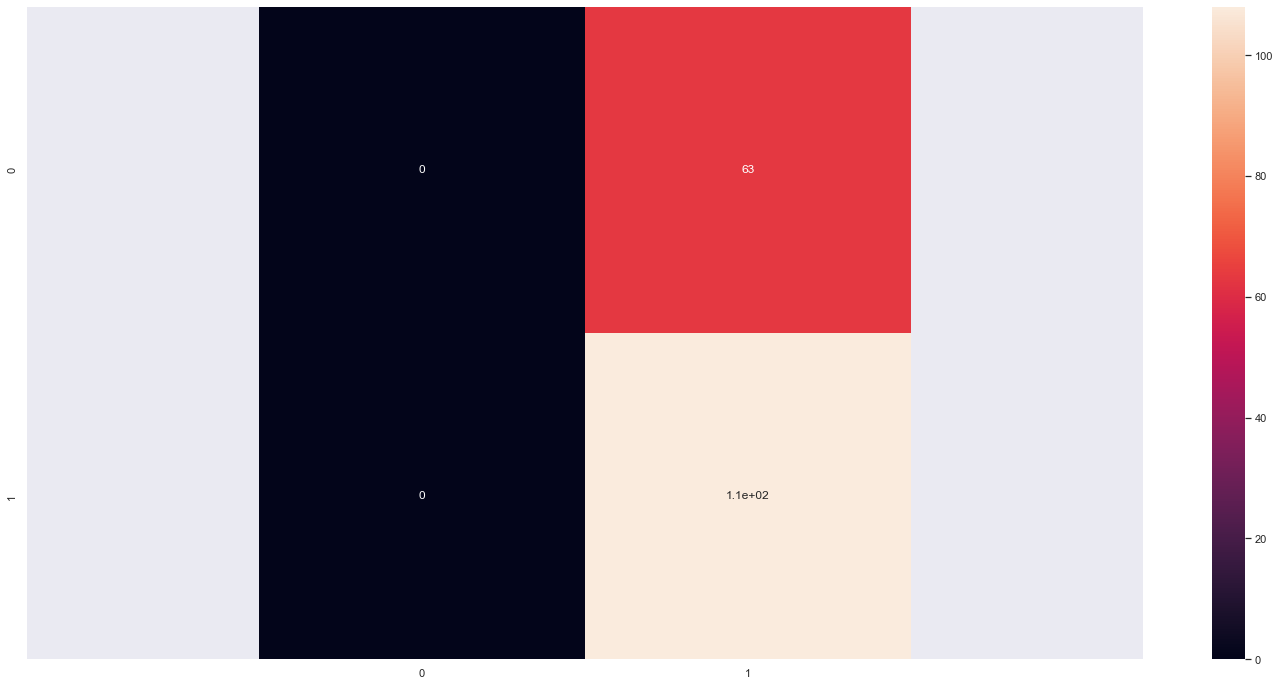

In [71]:
sns.heatmap (cf,annot=True)
plt.axis('equal')
plt.show()

In [72]:
nb.score(xts,yts)

0.631578947368421

In [73]:
df=pd.DataFrame({'Actual': yts.flatten(),'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
166,0,0
167,0,0
168,1,1
169,1,1


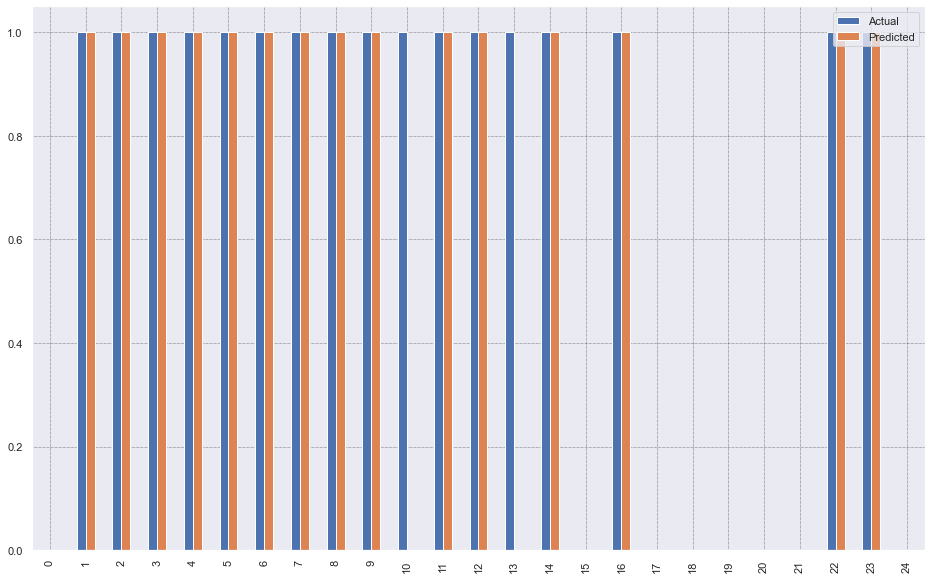

In [74]:
df1=df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='major',linestyle=':',linewidth='0.5',color='black')
plt.show()

# GaussianNB

In [75]:
ypred = gnb.predict(xts)

In [76]:
accuracy_score(yts,ypred)

0.9239766081871345

In [77]:
print(classification_report(yts,ypred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90        63
           1       0.94      0.94      0.94       108

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



In [78]:
cf = confusion_matrix(yts,ypred)
cf

array([[ 57,   6],
       [  7, 101]], dtype=int64)

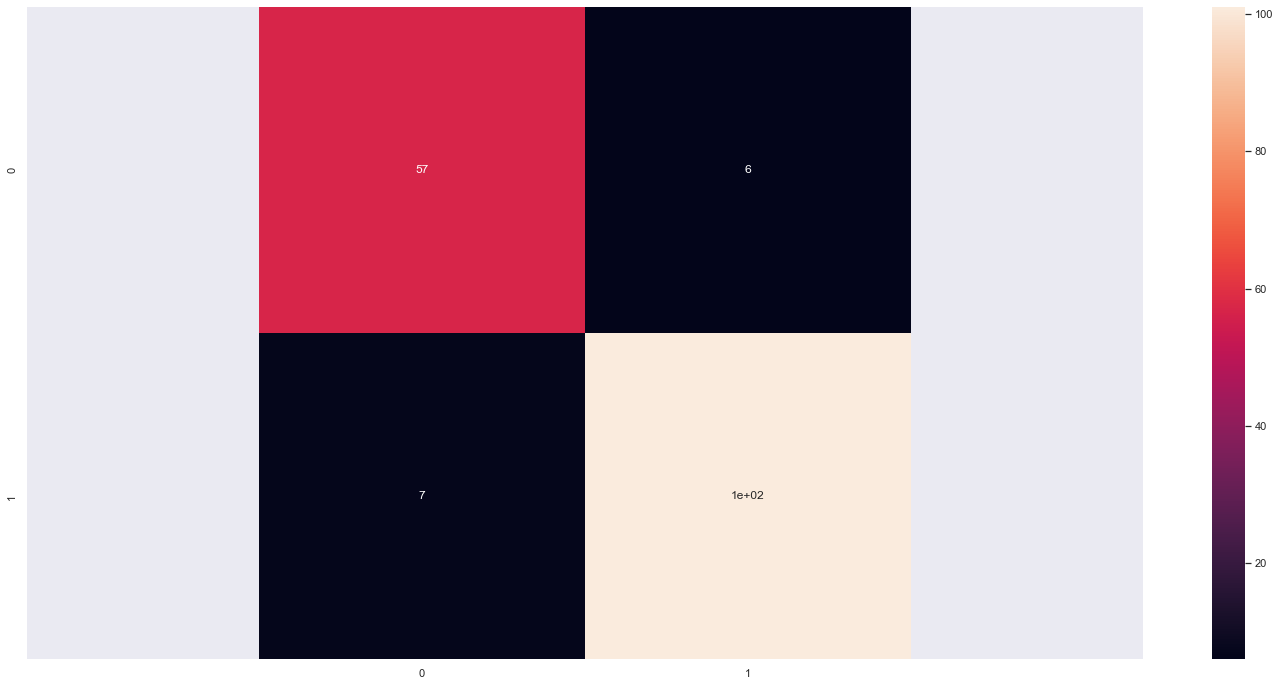

In [79]:
sns.heatmap (cf,annot=True)
plt.axis('equal')
plt.show()

In [80]:
gnb.score(xts,yts)

0.9239766081871345

In [81]:
df=pd.DataFrame({'Actual': yts.flatten(),'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
166,0,0
167,0,0
168,1,1
169,1,1


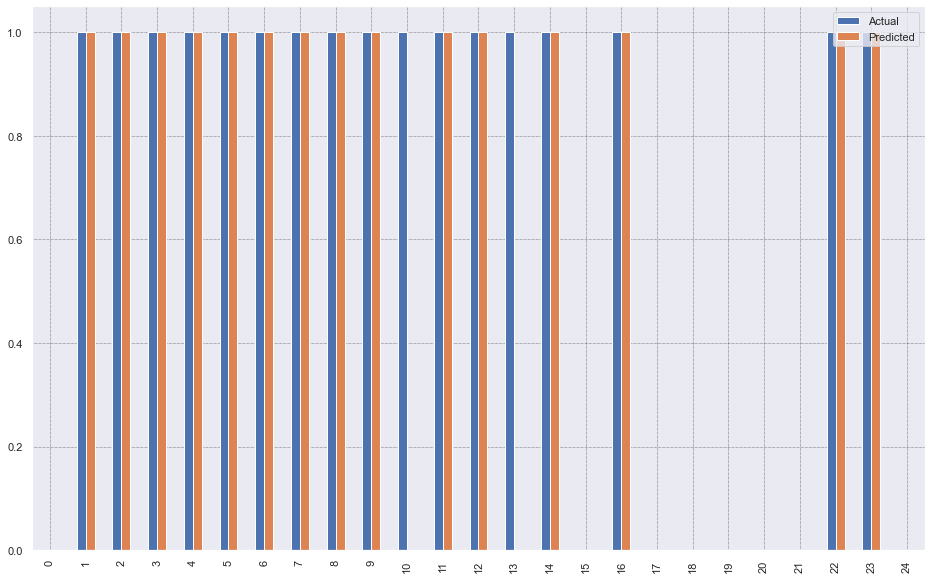

In [82]:
df1=df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='major',linestyle=':',linewidth='0.5',color='black')
plt.show()

# MultinomialNB

In [83]:
ypred = mnb.predict(xts)

In [84]:
accuracy_score(yts,ypred)

0.9005847953216374

In [85]:
print(classification_report(yts,ypred))

              precision    recall  f1-score   support

           0       0.96      0.76      0.85        63
           1       0.88      0.98      0.93       108

    accuracy                           0.90       171
   macro avg       0.92      0.87      0.89       171
weighted avg       0.91      0.90      0.90       171



In [86]:
cf = confusion_matrix(yts,ypred)
cf

array([[ 48,  15],
       [  2, 106]], dtype=int64)

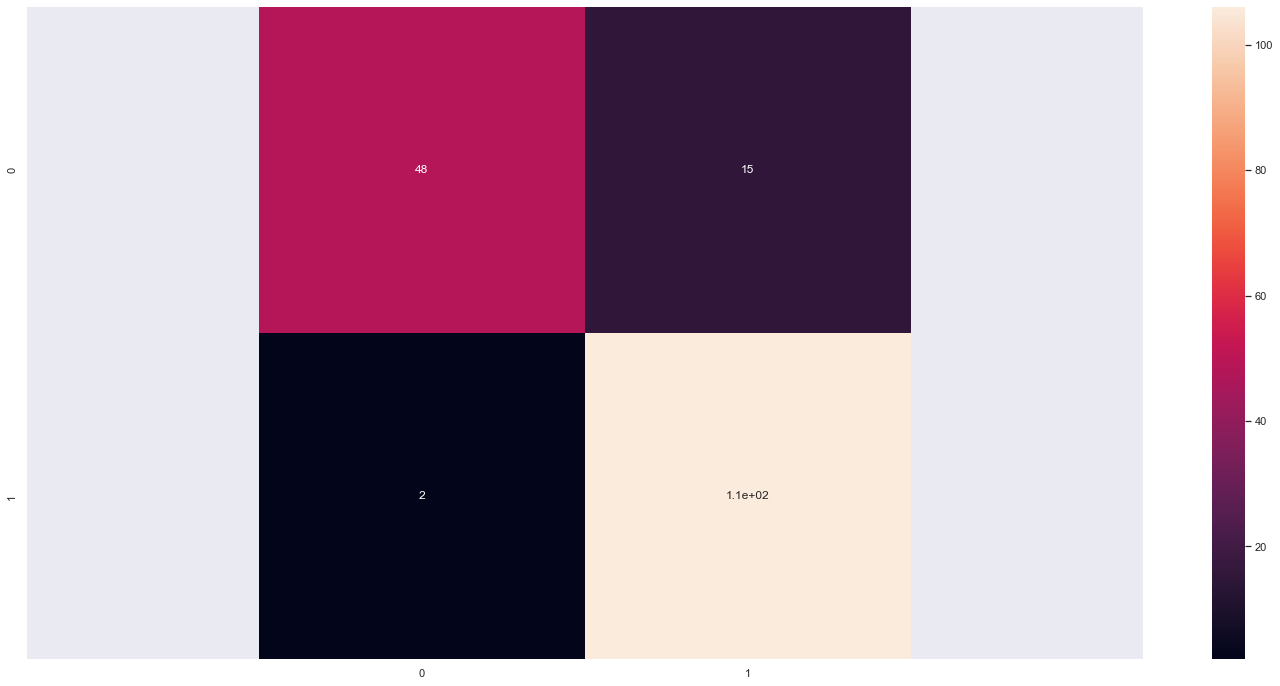

In [87]:
sns.heatmap (cf,annot=True)
plt.axis('equal')
plt.show()

In [88]:
mnb.score(xts,yts)

0.9005847953216374

In [89]:
df=pd.DataFrame({'Actual': yts.flatten(),'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
166,0,0
167,0,0
168,1,1
169,1,1


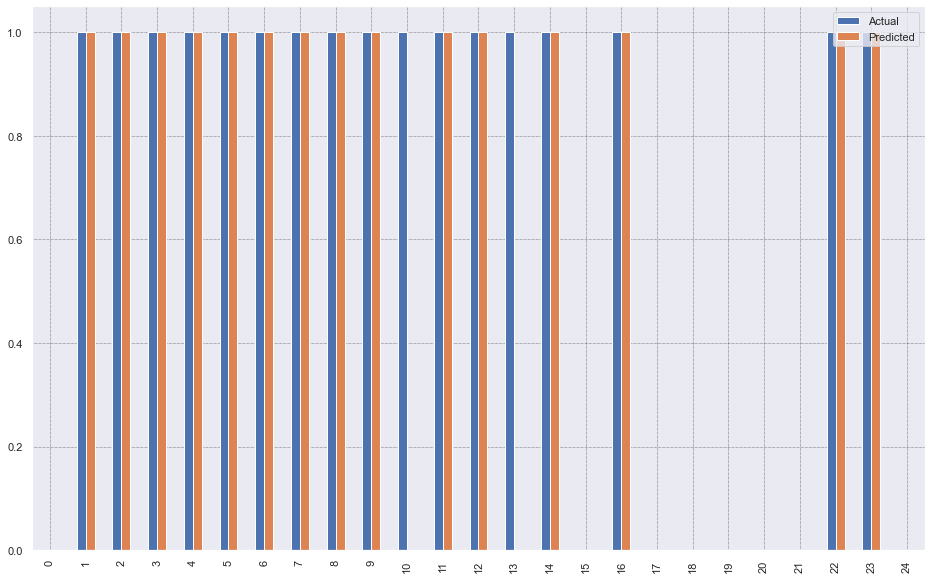

In [90]:
df1=df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='major',linestyle=':',linewidth='0.5',color='black')
plt.show()

# DT Regressor

In [91]:
myx.shape

(569, 30)

In [92]:
myy.shape

(569,)

In [93]:
feat = myx.values
classes = myy.values

In [94]:
(train_feat, test_feat, train_classes, test_classes) = train_test_split(feat, classes, random_state=100)
m = DecisionTreeRegressor().fit(train_feat, train_classes)

In [95]:
ypred = m.predict(test_feat)
print("MSE:",metrics.mean_squared_error(test_classes, ypred))

MSE: 0.055944055944055944


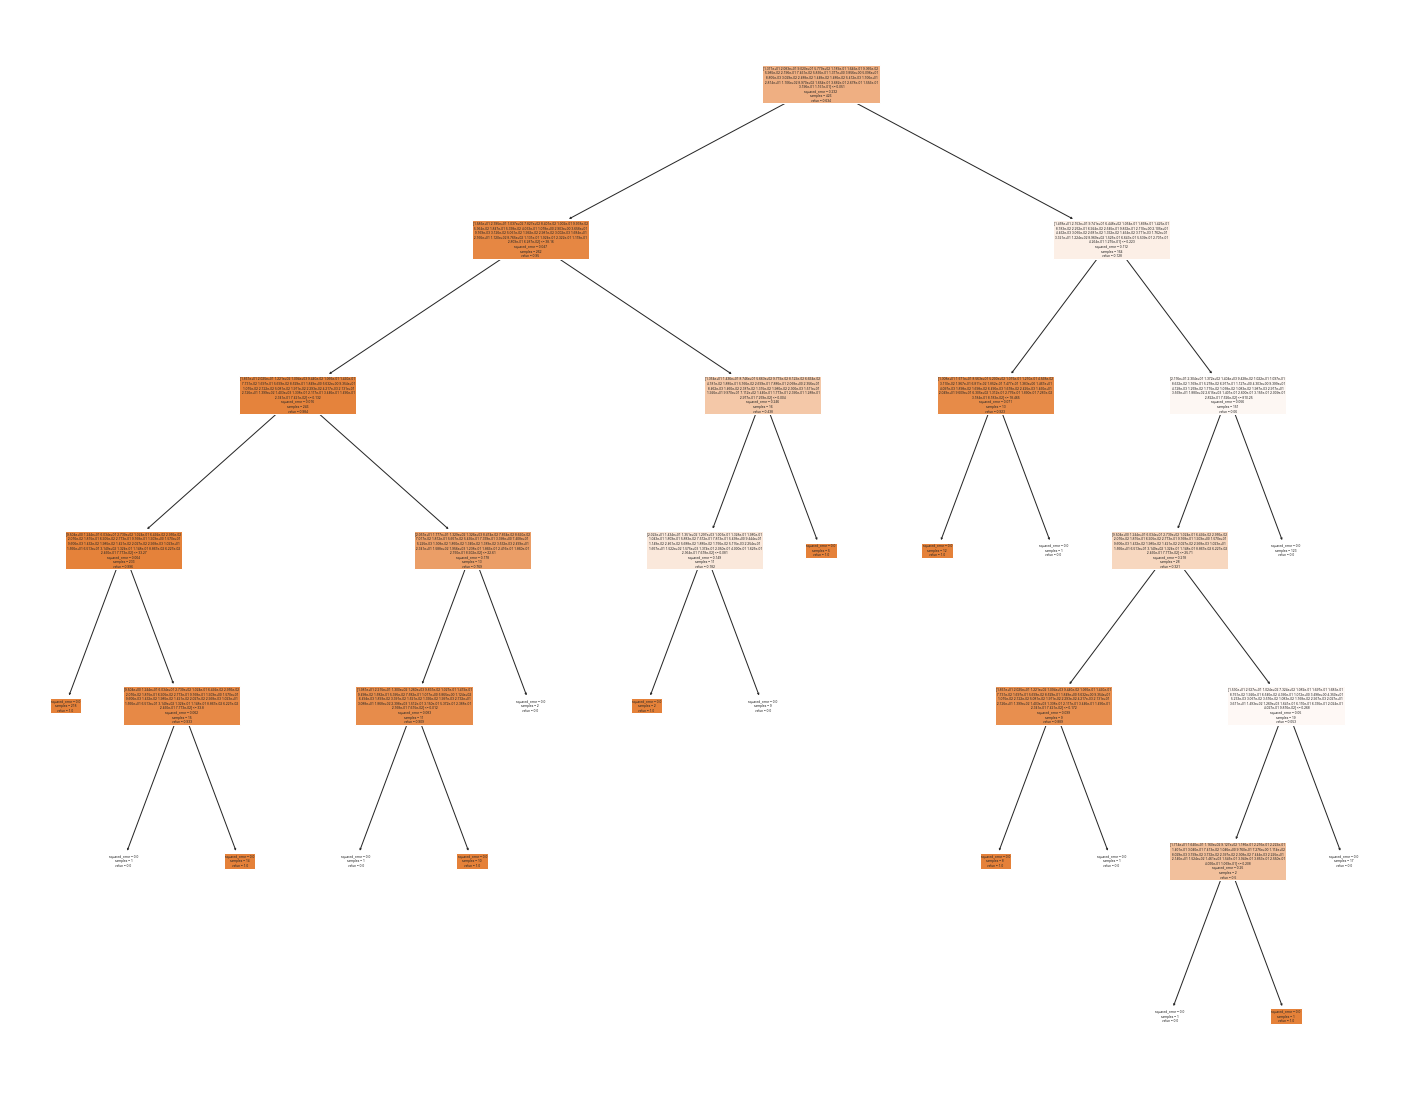

In [96]:
fig = plt.figure(figsize=(25, 20))
_= tree.plot_tree(m,
               feature_names = feat,
                  class_names = classes,
               filled = True)

In [97]:
text_representation = tree.export_text(m)
print(text_representation)

|--- feature_7 <= 0.05
|   |--- feature_13 <= 38.16
|   |   |--- feature_27 <= 0.13
|   |   |   |--- feature_21 <= 33.27
|   |   |   |   |--- value: [1.00]
|   |   |   |--- feature_21 >  33.27
|   |   |   |   |--- feature_21 <= 33.80
|   |   |   |   |   |--- value: [0.00]
|   |   |   |   |--- feature_21 >  33.80
|   |   |   |   |   |--- value: [1.00]
|   |   |--- feature_27 >  0.13
|   |   |   |--- feature_1 <= 22.61
|   |   |   |   |--- feature_18 <= 0.01
|   |   |   |   |   |--- value: [0.00]
|   |   |   |   |--- feature_18 >  0.01
|   |   |   |   |   |--- value: [1.00]
|   |   |   |--- feature_1 >  22.61
|   |   |   |   |--- value: [0.00]
|   |--- feature_13 >  38.16
|   |   |--- feature_19 <= 0.00
|   |   |   |--- feature_4 <= 0.08
|   |   |   |   |--- value: [1.00]
|   |   |   |--- feature_4 >  0.08
|   |   |   |   |--- value: [0.00]
|   |   |--- feature_19 >  0.00
|   |   |   |--- value: [1.00]
|--- feature_7 >  0.05
|   |--- feature_26 <= 0.22
|   |   |--- feature_20 <= 18.46
| 

In [98]:
m.score(test_feat,test_classes)

0.7651888341543515

# Cross Validation

In [99]:
# k-fold cross validation technique
kf = KFold(n_splits=5, random_state=1,shuffle=True)
# stratified kfold cross validation technique
skf = StratifiedKFold(n_splits=5) 
# LeaveOneOut cross validation technique
loocv = LeaveOneOut()
# shuffle split cross validation technique
shvc = ShuffleSplit()

In [100]:
# evaluating the data sets with kfold and DecisionTreeClassifier
dst = DecisionTreeClassifier()
scores = cross_val_score(dst,feat,classes,scoring='accuracy',cv=kf)
print('Accuracy using Decision Tree: %2f%%'%(scores.mean()*100))
print(scores)

Accuracy using Decision Tree: 92.971588%
[0.95614035 0.90350877 0.88596491 0.96491228 0.9380531 ]


In [101]:
# evaluating the data sets with kfold and Naive Bayes Classifier
nb = GaussianNB()
scores = cross_val_score(nb,feat,classes,scoring='accuracy',cv=kf)
print('Accuracy using GaussianNB: %2f%%'%(scores.mean()*100))
print(scores)

Accuracy using GaussianNB: 93.851886%
[0.94736842 0.93859649 0.9122807  0.93859649 0.95575221]


In [102]:
# evaluating the data sets with kfold and SVM
svm = SVC()
scores = cross_val_score(svm,feat,classes,scoring='accuracy',cv=kf)
print('Accuracy using SVC: %2f%%'%(scores.mean()*100))
print(scores)

Accuracy using SVC: 91.386431%
[0.90350877 0.92982456 0.88596491 0.94736842 0.90265487]


In [103]:
# evaluating the data sets with kfold and KNN Classifier
knn = KNeighborsClassifier()
scores = cross_val_score(knn,feat,classes,scoring='accuracy',cv=kf)
print('Accuracy using KNN: %2f%%'%(scores.mean()*100))
print(scores)

Accuracy using KNN: 92.268281%
[0.93859649 0.89473684 0.88596491 0.96491228 0.92920354]


In [104]:
# evaluating the data sets with Stratified KFold and DecisionTree
scores = cross_val_score(dst,feat,classes,scoring='accuracy',cv=skf)
print('Accuracy using Decision Tree: %2f%%'%(scores.mean()*100))
print(scores)

Accuracy using Decision Tree: 90.860115%
[0.90350877 0.9122807  0.89473684 0.92982456 0.90265487]


In [105]:
# evaluating the data sets Stratified KFold and Naive Bayes Classifier
scores = cross_val_score(nb,feat,classes,scoring='accuracy',cv=skf)
print('Accuracy using GaussianNB: %2f%%'%(scores.mean()*100))
print(scores)

Accuracy using GaussianNB: 93.851886%
[0.92105263 0.92105263 0.94736842 0.94736842 0.95575221]


In [106]:
# evaluating the data sets Stratified KFold and SVM
scores = cross_val_score(svm,feat,classes,scoring='accuracy',cv=skf)
print('Accuracy using SVM: %2f%%'%(scores.mean()*100))
print(scores)

Accuracy using SVM: 91.217202%
[0.85087719 0.89473684 0.92982456 0.94736842 0.9380531 ]


In [107]:
# evaluating the data sets Stratified KFold and KNN
scores = cross_val_score(knn,feat,classes,scoring='accuracy',cv=skf)
print('Accuracy using KNN: %2f%%'%(scores.mean()*100))
print(scores)

Accuracy using KNN: 92.794597%
[0.88596491 0.93859649 0.93859649 0.94736842 0.92920354]


In [108]:
# evaluating the data sets with LeaveOneOut and DecisionTree
scores = cross_val_score(dst,feat,classes,scoring='accuracy',cv=loocv)
print('Accuracy using GaussianNB: %2f%%'%(scores.mean()*100))
print(scores)

Accuracy using GaussianNB: 92.091388%
[1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 

In [109]:
# evaluating the data sets LeaveOneOut and Naive Bayes Classifier
scores = cross_val_score(nb,feat,classes,scoring='accuracy',cv=loocv)
print('Accuracy using GaussianNB: %2f%%'%(scores.mean()*100))
print(scores)

Accuracy using GaussianNB: 93.848858%
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 

In [110]:
# evaluating the data sets LeaveOneOut and SVM
scores = cross_val_score(svm,feat,classes,scoring='accuracy',cv=loocv)
print('Accuracy using SVM: %2f%%'%(scores.mean()*100))
print(scores)

Accuracy using SVM: 91.212654%
[1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1

In [111]:
# evaluating the data sets LeaveOneOut and KNN
scores = cross_val_score(knn,feat,classes,scoring='accuracy',cv=loocv)
print('Accuracy using KNN: %2f%%'%(scores.mean()*100))
print(scores)

Accuracy using KNN: 93.321617%
[1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1

In [112]:
# evaluating the data sets with ShuffleSplit and DecisionTree
scores = cross_val_score(dst,feat,classes,scoring='accuracy',cv=shvc)
print('Accuracy using GaussianNB: %2f%%'%(scores.mean()*100))
print(scores)

Accuracy using GaussianNB: 93.157895%
[0.92982456 0.92982456 0.94736842 0.89473684 0.92982456 0.9122807
 0.89473684 0.96491228 0.94736842 0.96491228]


In [113]:
# evaluating the data sets with ShuffleSplit and Naive Bayes Classifier
scores = cross_val_score(nb,feat,classes,scoring='accuracy',cv=shvc)
print('Accuracy using GaussianNB: %2f%%'%(scores.mean()*100))
print(scores)

Accuracy using GaussianNB: 94.561404%
[0.98245614 0.96491228 0.89473684 0.96491228 0.98245614 0.9122807
 0.92982456 0.94736842 0.96491228 0.9122807 ]


In [114]:
# evaluating the data sets with ShuffleSplit and SVM
scores = cross_val_score(svm,feat,classes,scoring='accuracy',cv=shvc)
print('Accuracy using GaussianNB: %2f%%'%(scores.mean()*100))
print(scores)

Accuracy using GaussianNB: 92.280702%
[0.9122807  0.9122807  0.94736842 0.9122807  0.89473684 0.96491228
 0.9122807  0.92982456 0.96491228 0.87719298]


In [115]:
# evaluating the data sets with ShuffleSplit and KNN
scores = cross_val_score(knn,feat,classes,scoring='accuracy',cv=shvc)
print('Accuracy using KNN: %2f%%'%(scores.mean()*100))
print(scores)

Accuracy using KNN: 95.964912%
[1.         0.98245614 0.92982456 0.89473684 1.         0.94736842
 0.96491228 0.98245614 0.94736842 0.94736842]
